# Repeat the raw image plot from satellite_III

In [1]:
from e582utils.data_read import download
import numpy as np
import h5py
import sys
from e582lib.radiation import planckInvert
from e582lib.modis_reproject import modisl1b_resample
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
import warnings
myd02file = 'MYD021KM.A2016136.2015.006.2016138123353.h5'
download(myd02file)
myd03file='MYD03.A2016136.2015.006.2016138121537.h5'
download(myd03file)
# myd02file="MYD021KM.A2016224.2100.006.2016225153002.h5"
# download(myd02file)
# myd03file="MYD03.A2016224.2100.006.2016225152335.h5"

downloaded MYD021KM.A2016136.2015.006.2016138123353.h5
size = 155338872
downloaded MYD03.A2016136.2015.006.2016138121537.h5
size = 41848985


In [2]:
import scipy.constants as sc
sc.h
sc.c
sc.k

1.38064852e-23

Here is the corresponding red,green,blue color composite for the granule.

In [3]:
from IPython.display import Image
Image(url='http://clouds.eos.ubc.ca/~phil/courses/atsc301/downloads/aqua_136_2015.jpg',width=600)

In [4]:
chan_list=['31']
result_dict=\
       modisl1b_resample(myd02file,myd03file,chan_list)

index and mean 0 7.276303291320801
running modisl1b_resample: here are the channels to be resampled
channel and mean 31 6.854452610015869
pyresample area_def information:

dump area definition:
Area ID: granule
Name: modis swath 5min granule
Projection ID: laea
Projection: {'datum': 'WGS84', 'lat_0': '58.75', 'lon_0': '-118.25', 'proj': 'laea', 'units': 'm'}
Number of columns: 2327
Number of rows: 2090
Area extent: (-1296437.7441421314, -1249531.9506374167, 1728684.3829633493, 1467858.1792684665)


x and y pixel dimensions in meters:
1300.0095088549554
1300.1866650267384

completed modisl1b_resample


Now call the planckInvert function imported at the top of the notebook to convert radiance to brightness temperature

In [5]:
result_dict['channels'].shape

(2090, 2327, 1)

In [6]:
wavel=11.e-6  #chan 31 central wavelength, meters
chan31_mks = result_dict['channels'][:,:,0]*1.e6  #W/m^2/m/sr
Tbright = planckInvert(wavel,chan31_mks)
print(np.nanmean(Tbright))
Tbright = Tbright - 273.15 #convert to Centigrade
Tbright=chan31_mks*1.e-6
print(np.nanmean(Tbright))

277.576
6.85445


In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('plasma')
vmin= 0
vmax= 10
cmap.set_over('w')
cmap.set_under('k',alpha=0.3)
cmap.set_bad('b',alpha=0.1)
the_norm=Normalize(vmin=vmin,vmax=vmax,clip=False)

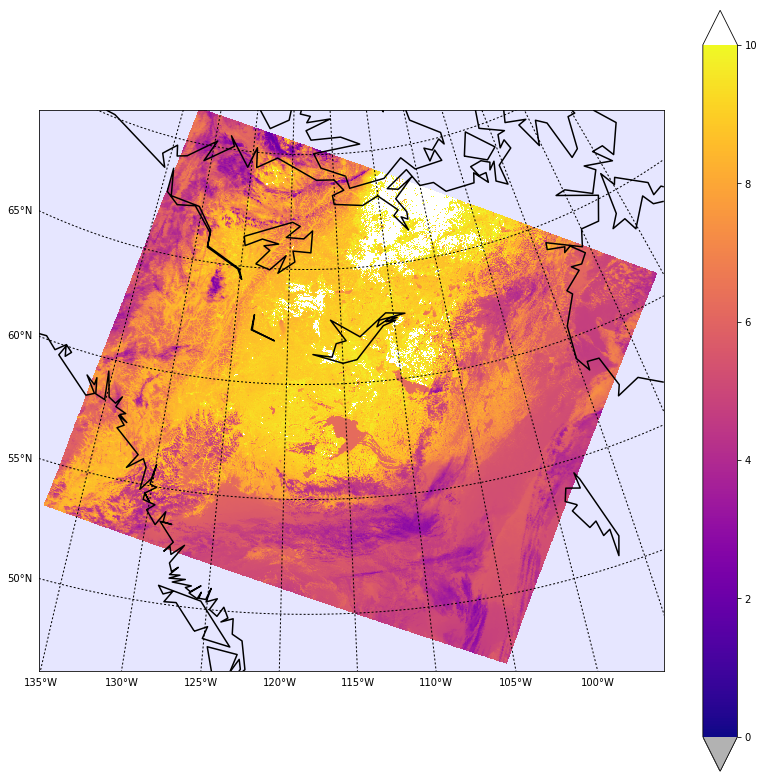

In [8]:
plt.close('all)')
fig,ax=plt.subplots(1,1,figsize=(14,14))
basemap_args=result_dict['basemap_args']
basemap_args['ax']=ax
basemap_args['resolution']='c'
import warnings
warnings.filterwarnings("ignore")
bmap=Basemap(**basemap_args)
CS=bmap.imshow(Tbright,cmap=cmap,norm=the_norm)
cax=fig.colorbar(CS,ax=ax,extend='both')
lat_sep,lon_sep= 5,5
parallels = np.arange(30, 80, lat_sep)
meridians = np.arange(-135, -80, lon_sep)
bmap.drawparallels(parallels, labels=[1, 0, 0, 0],
                       fontsize=10, latmax=90)
bmap.drawmeridians(meridians, labels=[0, 0, 0, 1],
                       fontsize=10, latmax=90)
bmap.drawcoastlines(linewidth=1.5, linestyle='solid', color='k')